# Recommender system

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
books_df=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\Dataset\\Books.csv")
ratings_df=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\Dataset\\Ratings.csv")
users_df=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\Dataset\\Users.csv")

# Books dataset

In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
books_df.shape

(271360, 8)

In [6]:
(books_df.isnull().sum()/len(books_df))*100

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000369
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.001106
dtype: float64

# we can see that less no of Null values in Book-Author,Publisher,Image-URL-L features.

In [7]:
books_df1=books_df.dropna()

In [8]:
books_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  object
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


# Since there are less NUll values in  Book-Author,Publisher,Image-URL-L features so we can drop those rows.

# Ratings dataset

In [9]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [11]:
ratings_df.shape

(1048575, 3)

In [12]:
(ratings_df.isnull().sum()/len(ratings_df))*100

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

# As we can see that there is no null values in rating dataset

# Users dataset

In [13]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [14]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
users_df.shape

(278858, 3)

In [16]:
(users_df.isnull().sum()/len(users_df))*100

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

<AxesSubplot:xlabel='Age'>

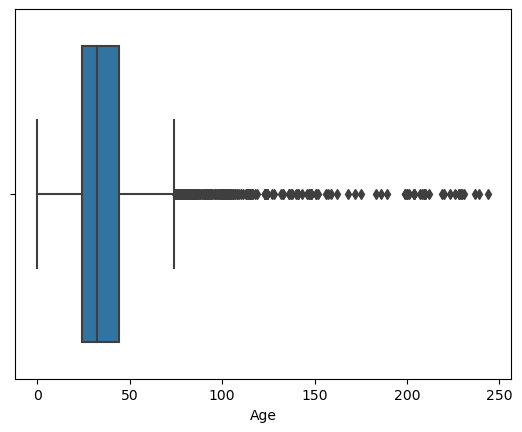

In [17]:
sns.boxplot(users_df['Age'])

In [18]:
users_df['Age'].skew()

1.178391610309946

In [19]:
users_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [20]:
users_df1 = users_df[pd.notnull(users_df['Location'])]
users_df1

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [21]:
users_df1[['City', 'State', 'Country']] = users_df1['Location'].str.split(', ', expand=True, n=2)
users_df1[['City', 'State', 'Country']] = users_df1[['City', 'State', 'Country']].fillna("Not specified")

In [22]:
users_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278858 entries, 0 to 278857
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
 3   City      278858 non-null  object 
 4   State     278858 non-null  object 
 5   Country   278858 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 14.9+ MB


# As we can see that in Age column approximately there are 40% of Null values

## If there are a high percentage of missing values in the Age column, replacing the missing values with the mean or median may not be appropriate. This is because the mean or median of the non-missing values may not be a good representation of the missing values. If a high percentage of the data is missing, it can skew the mean or median, making it a less accurate representation of the population.

## If the data is missing completely at random (MCAR), it means that the probability of a value being missing is independent of the missing value and of any other values in the dataset. In this case, the missing values are a random subset of the data, and the sample with the missing values is a random subset of the full data. In this scenario, imputation methods such as mean, median, random sampling, or interpolation can be used.

In [23]:
users_df1["Age"]= users_df1["Age"].fillna( users_df1["Age"].mean())

In [24]:
users_df1["Age"] = users_df1["Age"].round(0)

### The interpolate method is appropriate when the data is missing at random and there is a clear relationship between the missing and non-missing values. It is important to note that interpolation method assumes that there is a relationship between the missing and non-missing values, and that the missing values are not a random subset of the data

In [25]:
users_df1.head()

,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",35.0,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",35.0,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",35.0,farnborough,hants,united kingdom


In [26]:
from textblob import TextBlob
import re

In [27]:
users_df1.Location=users_df1.Location.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))
users_df1.Location=users_df1.Location.apply(lambda x: x.title())
users_df1

,User-ID,Location,Age,City,State,Country
0,1,Nyc New York Usa,35.0,nyc,new york,usa
1,2,Stockton California Usa,18.0,stockton,california,usa
2,3,Moscow Yukon Territory Russia,35.0,moscow,yukon territory,russia
3,4,Porto Vngaia Portugal,17.0,porto,v.n.gaia,portugal
4,5,Farnborough Hants United Kingdom,35.0,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,Portland Oregon Usa,35.0,portland,oregon,usa
278854,278855,Tacoma Washington United Kingdom,50.0,tacoma,washington,united kingdom
278855,278856,Brampton Ontario Canada,35.0,brampton,ontario,canada
278856,278857,Knoxville Tennessee Usa,35.0,knoxville,tennessee,usa


In [28]:
users_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278858 entries, 0 to 278857
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
 3   City      278858 non-null  object 
 4   State     278858 non-null  object 
 5   Country   278858 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 14.9+ MB


# Merge the 3 datasets into one master dataset

In [29]:
data=ratings_df.merge(users_df1,left_on='User-ID',right_on='User-ID',how="left")

In [30]:
data=data.merge(books_df1,left_on='ISBN',right_on='ISBN',how="left")

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1048575 non-null  int64  
 1   ISBN                 1048575 non-null  object 
 2   Book-Rating          1048575 non-null  int64  
 3   Location             1048575 non-null  object 
 4   Age                  1048575 non-null  float64
 5   City                 1048575 non-null  object 
 6   State                1048575 non-null  object 
 7   Country              1048575 non-null  object 
 8   Book-Title           941105 non-null   object 
 9   Book-Author          941105 non-null   object 
 10  Year-Of-Publication  941105 non-null   object 
 11  Publisher            941105 non-null   object 
 12  Image-URL-S          941105 non-null   object 
 13  Image-URL-M          941105 non-null   object 
 14  Image-URL-L          941105 non-null   object 
dty

In [32]:
df=data.dropna()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941105 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              941105 non-null  int64  
 1   ISBN                 941105 non-null  object 
 2   Book-Rating          941105 non-null  int64  
 3   Location             941105 non-null  object 
 4   Age                  941105 non-null  float64
 5   City                 941105 non-null  object 
 6   State                941105 non-null  object 
 7   Country              941105 non-null  object 
 8   Book-Title           941105 non-null  object 
 9   Book-Author          941105 non-null  object 
 10  Year-Of-Publication  941105 non-null  object 
 11  Publisher            941105 non-null  object 
 12  Image-URL-S          941105 non-null  object 
 13  Image-URL-M          941105 non-null  object 
 14  Image-URL-L          941105 non-null  object 
dtypes: float64(1), i

In [34]:
df['Year-Of-Publication']=df['Year-Of-Publication'].astype(int)

# Categorizing the age column by 'Children', 'Teenage', 'Young-adults', 'Middle-aged adults', 'Old-Aged adults', 'Very-Aged adults'

In [35]:
bin_edges = [0, 12, 20, 40, 60, 100,120]
bin_names = ['Children', 'Teenage', 'Young-adults', 'Middle-aged adults', 'Old-Aged adults', 'Very-Aged adults']
df['Age_category'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

In [36]:
df.reset_index()

,index,User-ID,ISBN,Book-Rating,Location,Age,City,State,Country,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age_category
0,0,276725,034545104X,0,Tyler Texas Usa,35.0,tyler,texas,usa,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Young-adults
1,1,276726,155061224,5,Seattle Washington Usa,35.0,seattle,washington,usa,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,Young-adults
2,2,276727,446520802,0,H New South Wales Australia,16.0,h,new south wales,australia,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,Teenage
3,3,276729,052165615X,3,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,Teenage
4,4,276729,521795028,6,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,Teenage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941100,1048570,250764,451410777,0,Cove Oregon Usa,35.0,cove,oregon,usa,Sleep Tight (Onyx Book),Anne Frasier,2003,Onyx Books,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...,Young-adults
941101,1048571,250764,452264464,8,Cove Oregon Usa,35.0,cove,oregon,usa,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,Young-adults
941102,1048572,250764,048623715X,0,Cove Oregon Usa,35.0,cove,oregon,usa,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,Young-adults
941103,1048573,250764,486256588,0,Cove Oregon Usa,35.0,cove,oregon,usa,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,Young-adults


In [168]:
df['Publisher'].nunique()

16115

# Descriptive statistics

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,941105.0,128793.839451,74247.985759,2.0,63494.0,128835.0,193560.0,278854.0
Book-Rating,941105.0,2.851685,3.857918,0.0,0.0,0.0,7.0,10.0
Age,941105.0,36.952763,12.180610,0.0,31.0,35.0,41.0,244.0
Year-Of-Publication,941105.0,1968.199841,231.030436,0.0,1992.0,1997.0,2001.0,2050.0


In [38]:
import sweetviz
my_report = sweetviz.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data visualization

# Rating distribution

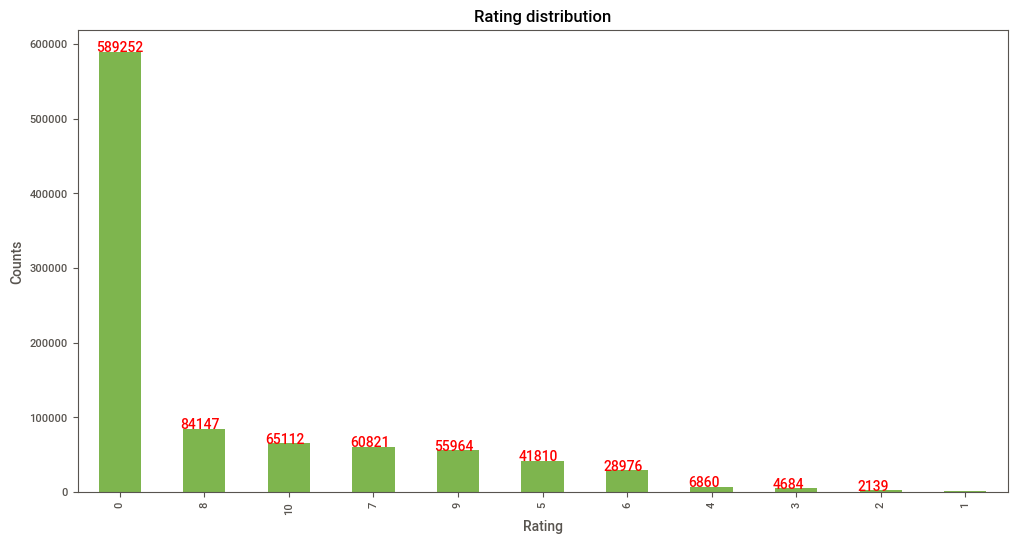

In [39]:
fig=plt.figure(figsize=(12,6))
df['Book-Rating'].value_counts(sort=True).plot(kind='bar',color='#7eb54e')
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Counts')

for index, value in enumerate(list(df['Book-Rating'].value_counts()[0:10].values)):
    plt.text(index-0.28, value+10, str(value), color = 'red', fontweight = 'bold', fontsize = 10)
plt.show()

<!-- # Most no of books has received zero 'ratings
# Least no of books has received '2' ratings -->

## Most frequently appeared ratings for books are '0' ratings by users
## Least frequently appeared ratings for books are '2' ratings by users

#  List of 10 books with high number of ratings

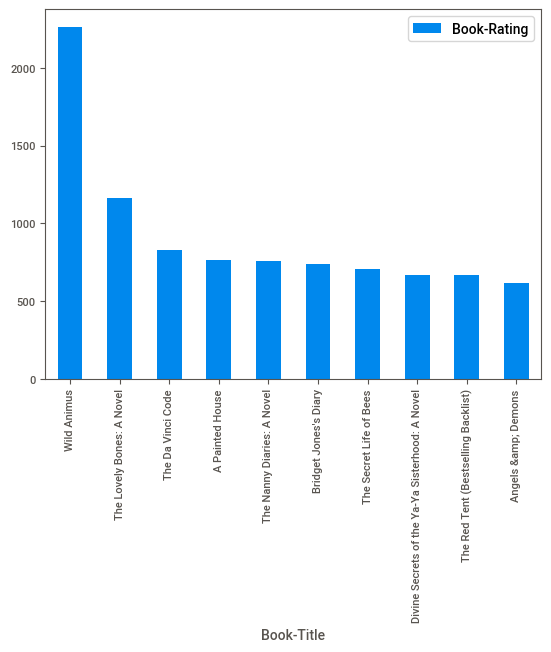

In [40]:
high_ratings=df.groupby('Book-Title')[['Book-Rating']].count()
high_ratings=high_ratings.nlargest(10,columns='Book-Rating')
high_ratings.plot(kind='bar')
plt.show()

# Book wild animus has received more than 2000 ratings

# List of 10 Authors with high number of ratings

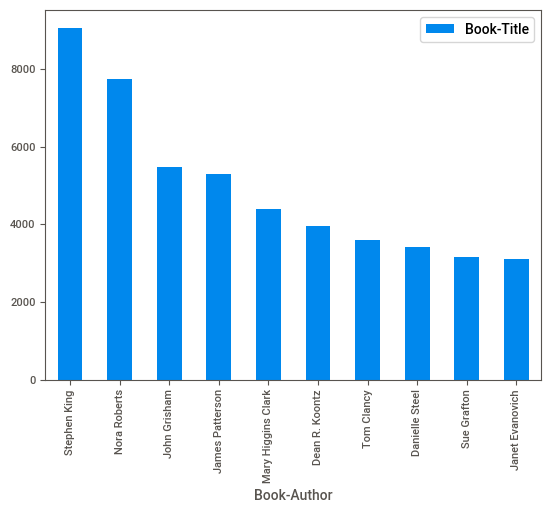

In [41]:
high_ratings1=df.groupby('Book-Author')[['Book-Title']].count()
high_ratings=high_ratings1.nlargest(10,columns='Book-Title')
high_ratings.plot(kind='bar')
plt.show()

# Bar Plot for top 10 authors mentioned in the dataframe

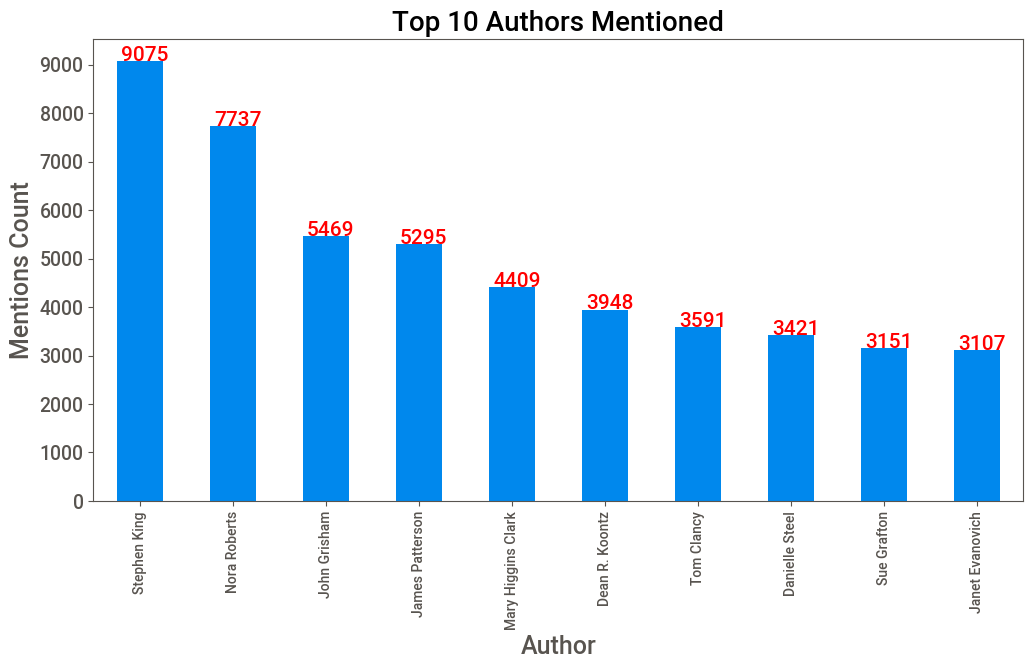

In [42]:
top10_mention = df['Book-Author'].value_counts()[:10]
plt.figure(figsize=[12,6])
top10_mention.plot(kind='bar')

plt.title("Top 10 Authors Mentioned", fontsize=20)
plt.xlabel('Author', fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel('Mentions Count', fontsize=18)
plt.yticks(np.arange(0,10000,1000), fontsize=14)

for index, value in enumerate(list(top10_mention.values)):
    plt.text(index-0.2, value+10, str(value), color = 'red', fontsize = 15)
plt.show()

In [43]:
# Find the number of unique books written by each author
author_unique_books = df.groupby('Book-Author')['Book-Title'].nunique()

# Print the top 5 authors with the most unique books
print(author_unique_books.sort_values(ascending=False).head(5))

Book-Author
William Shakespeare    476
Agatha Christie        468
Ann M. Martin          387
Carolyn Keene          359
Francine Pascal        347
Name: Book-Title, dtype: int64


# Stephen king is most mentioned author among the other authors

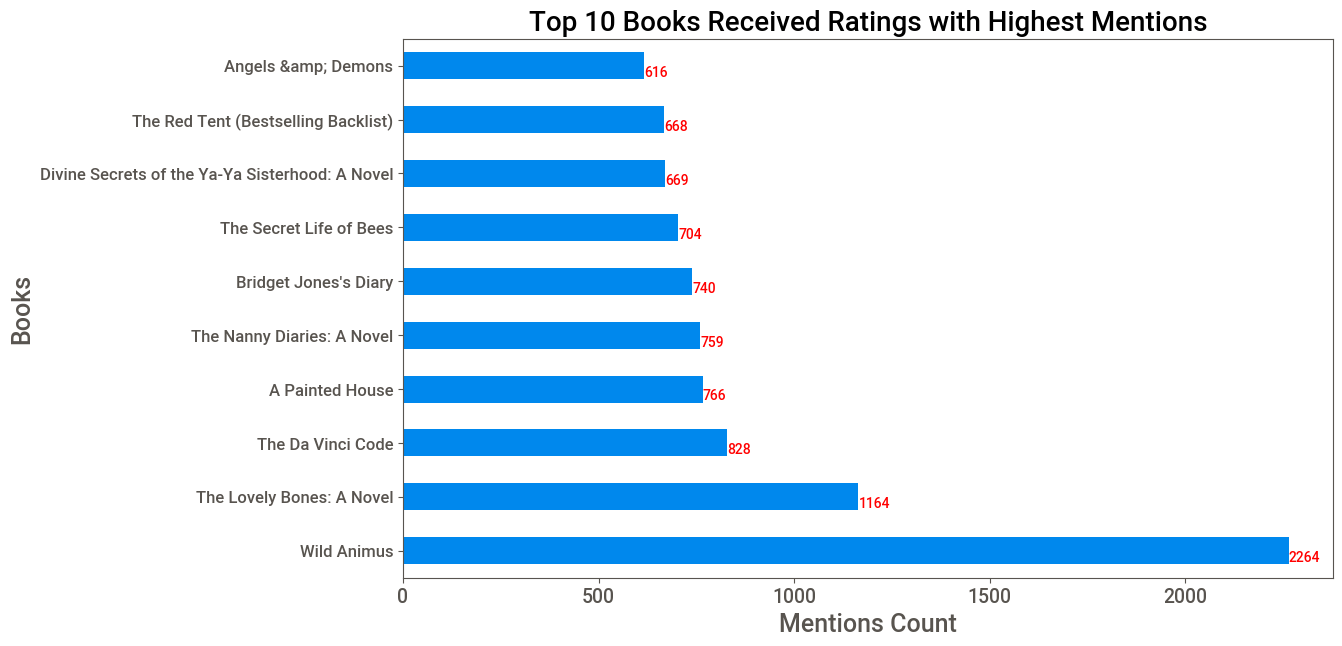

In [44]:
plt.figure(figsize=[12,7])
ax = df['Book-Title'].value_counts()[:10].plot.barh()

plt.title("Top 10 Books Received Ratings with Highest Mentions", fontsize=20)
plt.xlabel('Mentions Count', fontsize=18)
plt.xticks(np.arange(0,2500,500),fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Books', fontsize=18)

for index, value in enumerate(list(df['Book-Title'].value_counts()[:10].values)):
    ax.text(value+0.5, index-.2, str(value), color = 'red', fontweight = 'bold')
plt.show()

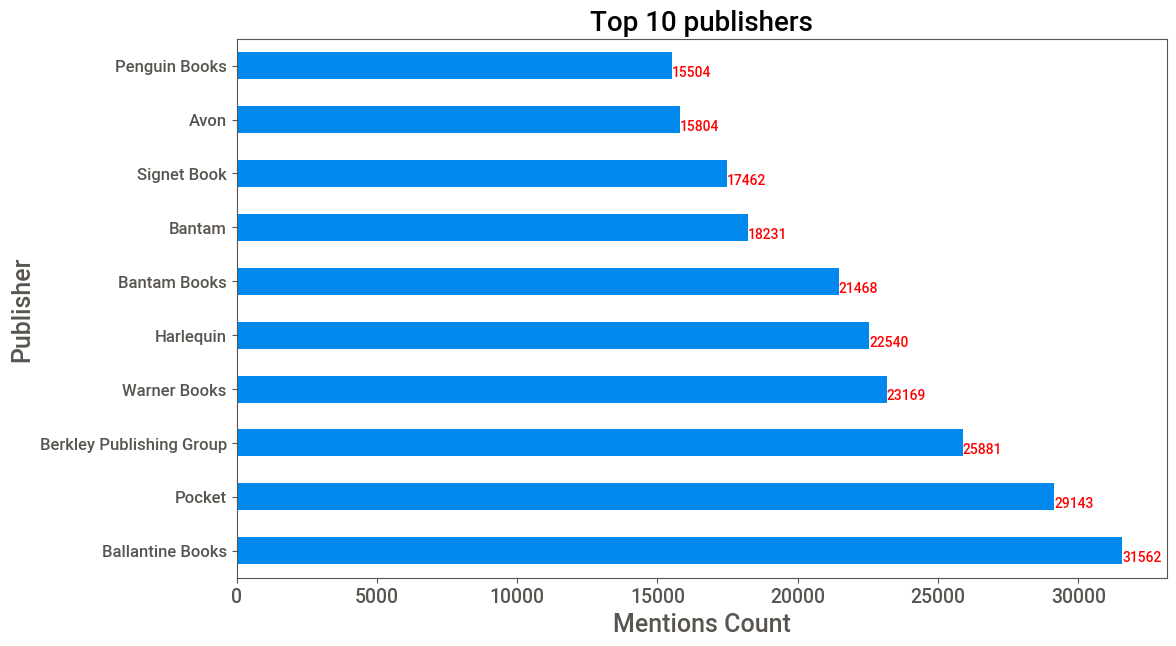

In [45]:
plt.figure(figsize=[12,7])
ax = df['Publisher'].value_counts()[:10].plot.barh()

plt.title("Top 10 publishers", fontsize=20)
plt.xlabel('Mentions Count', fontsize=18)
plt.xticks(np.arange(0,35000,5000),fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Publisher', fontsize=18)

for index, value in enumerate(list(df['Publisher'].value_counts()[:10].values)):
    ax.text(value+0.5, index-.2, str(value), color = 'red', fontweight = 'bold')
plt.show()

# Top 10 Book code received highest no of ratings 

<AxesSubplot:xlabel='ISBN'>

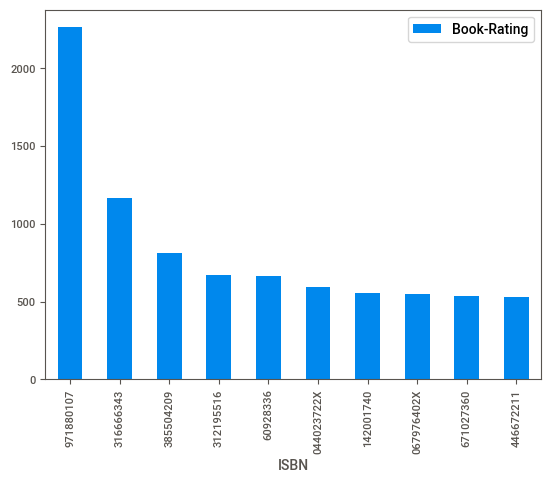

In [46]:
rating_count=pd.DataFrame(df.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False)[:10].plot(kind='bar')

# book-code 971880107 has received most no of ratings

In [47]:
location_df=df.iloc[:,[5,6,7]]

In [48]:
location_df

,City,State,Country
0,tyler,texas,usa
1,seattle,washington,usa
2,h,new south wales,australia
3,rijeka,n/a,croatia
4,rijeka,n/a,croatia
...,...,...,...
1048570,cove,oregon,usa
1048571,cove,oregon,usa
1048572,cove,oregon,usa
1048573,cove,oregon,usa


In [49]:
location_df['Country'].value_counts()[:10]

usa               680754
canada             84083
united kingdom     29909
germany            25595
Not specified      22444
australia          16261
spain              13400
n/a                11180
france              9977
portugal            5889
Name: Country, dtype: int64

# Find out what is the over all share of The USA

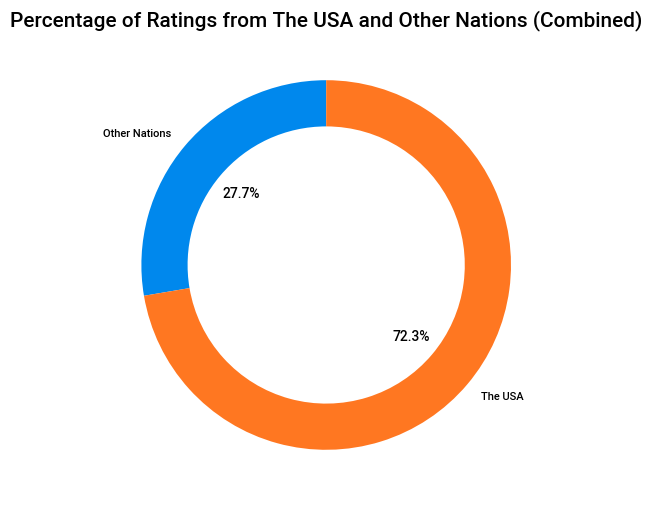

In [50]:
labels=['Other Nations', 'The USA']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie([len(location_df[location_df['Country']!='usa']), len(location_df[location_df['Country']=='usa'])], labels=labels, autopct='%1.1f%%',
       wedgeprops={'width':0.25}, startangle=90)
ax.set_title('Percentage of Ratings from The USA and Other Nations (Combined)', fontsize=15)
plt.show()

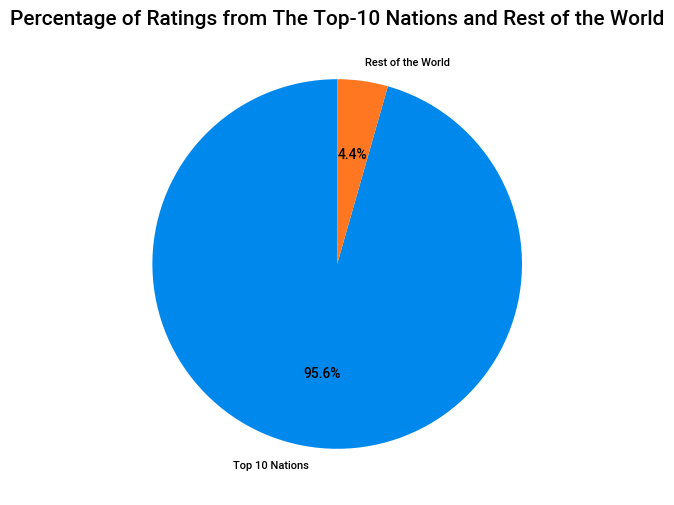

In [51]:
labels=['Top 10 Nations', 'Rest of the World']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie([len(location_df[location_df['Country'].isin(list(location_df['Country'].value_counts()[0:10].keys()))]), 
        len(location_df[~location_df['Country'].isin(list(location_df['Country'].value_counts()[0:10].keys()))])], labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Percentage of Ratings from The Top-10 Nations and Rest of the World', fontsize=15)
plt.show()

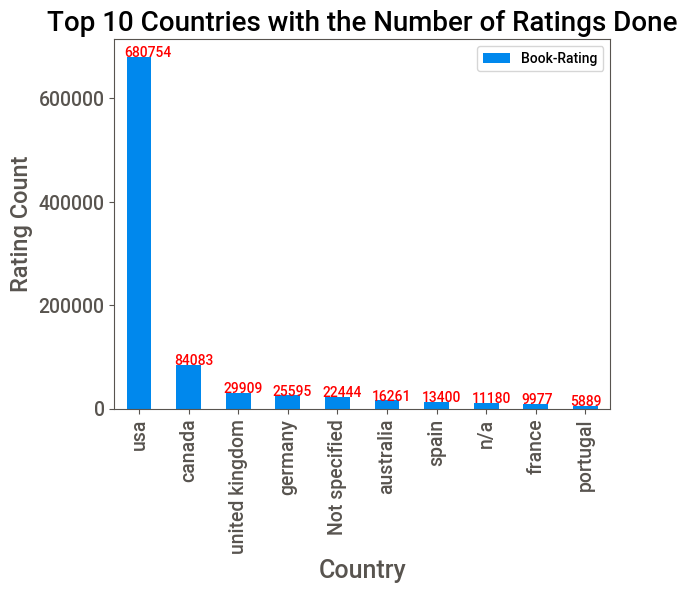

In [52]:
high_ratings=df.groupby('Country')[['Book-Rating']].count()
high_ratings=high_ratings.nlargest(10,columns='Book-Rating')
high_ratings.plot(kind='bar')

plt.title("Top 10 Countries with the Number of Ratings Done", fontsize=20)
plt.xlabel('Country', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Rating Count', fontsize=17)
plt.yticks(np.arange(0,800000,200000), fontsize=14)

for index, value in enumerate(list(df['Country'].value_counts()[0:10].values)):
  plt.text(index-0.3, value+40, str(value), color = 'red', fontweight = 'bold', fontsize = 10)
plt.show()

(<Figure size 1000x600 with 1 Axes>,
 <AxesSubplot:xlabel='Age_category', ylabel='count'>)

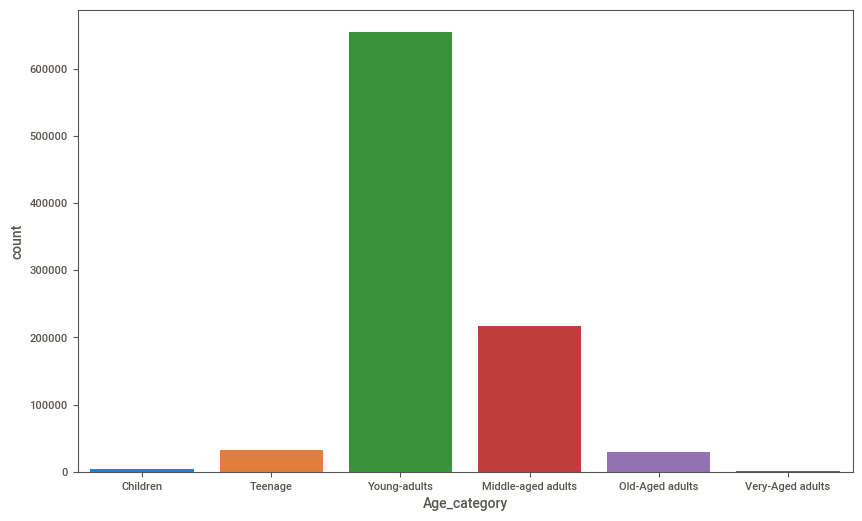

In [53]:
fig=plt.figure(figsize=(10,6))
fig,sns.countplot(df['Age_category'])

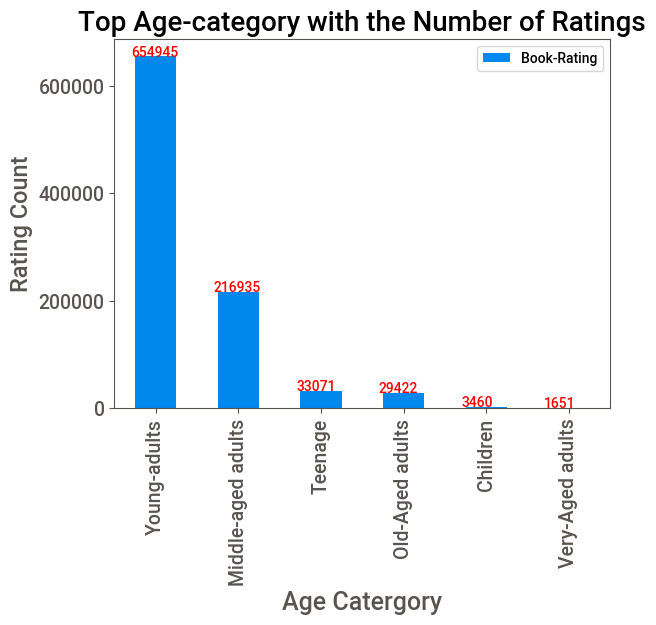

In [54]:
high_ratings=df.groupby('Age_category')[['Book-Rating']].count()
high_ratings=high_ratings.nlargest(10,columns='Book-Rating')
high_ratings.plot(kind='bar')

plt.title("Top Age-category with the Number of Ratings", fontsize=20)
plt.xlabel('Age Catergory', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Rating Count', fontsize=17)
plt.yticks(np.arange(0,800000,200000), fontsize=14)

for index, value in enumerate(list(df['Age_category'].value_counts()[0:10].values)):
  plt.text(index-0.3, value+40, str(value), color = 'red', fontweight = 'bold', fontsize = 10)
plt.show()

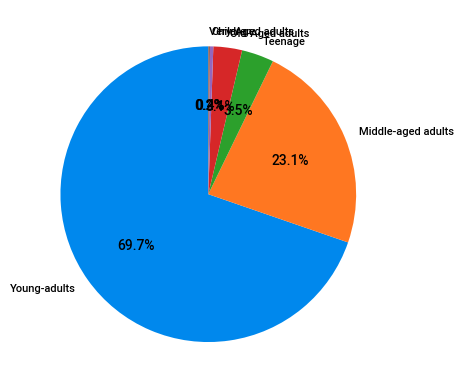

In [55]:
labels = df['Age_category'].value_counts().index
plt.pie(df['Age_category'].value_counts(),labels=labels,autopct='%1.1f%%', startangle=90);

# WORK CLOUD

In [56]:
from wordcloud import WordCloud

In [57]:
def create_wordcloud(data):
    wordcloud = WordCloud(
        width=1500,
        height=800,
        min_font_size=12,
        background_color='white'
    ).generate(data)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

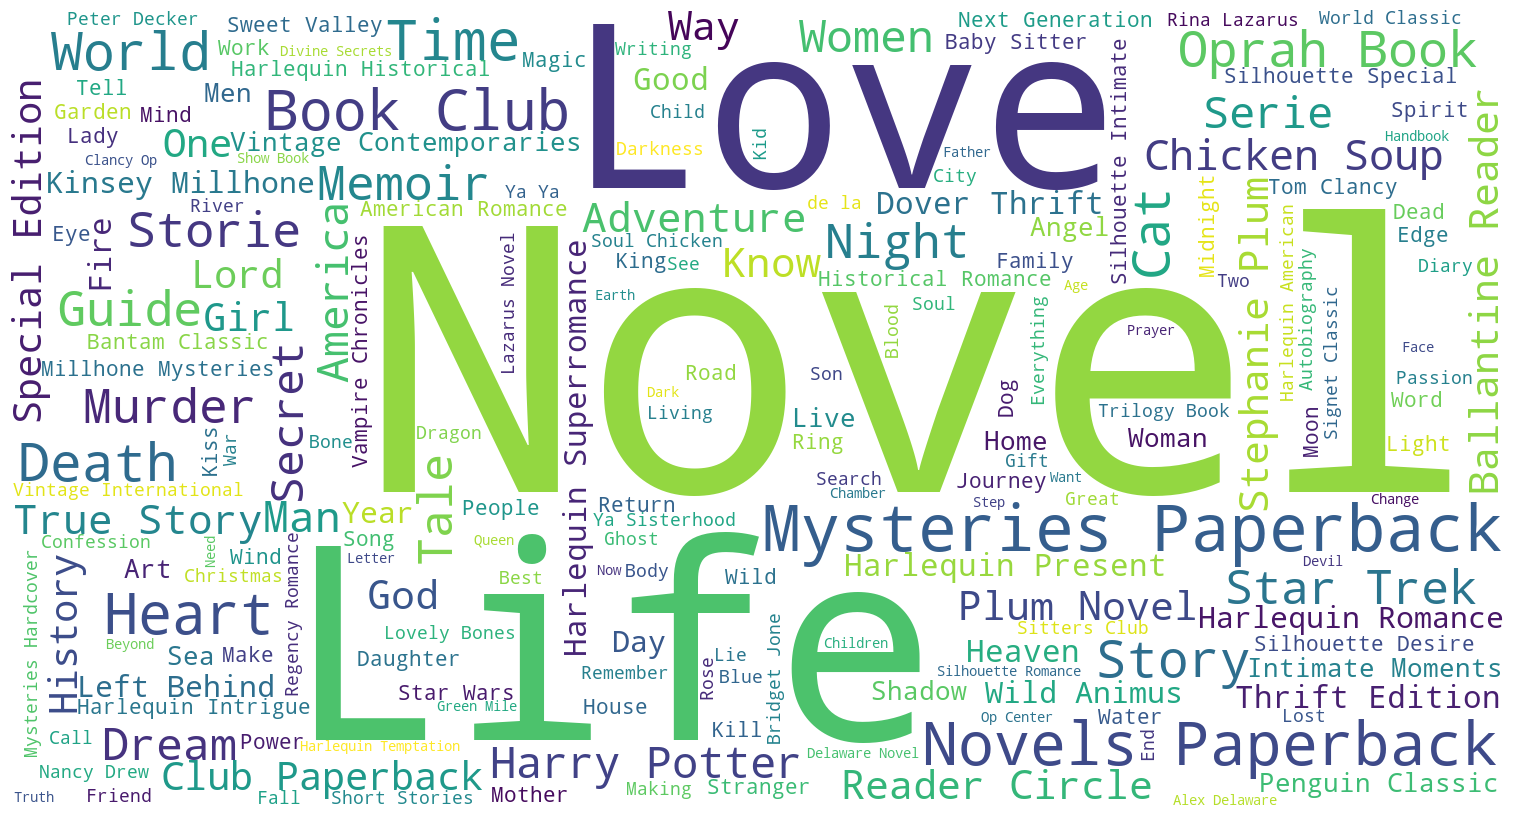

In [58]:
book_joined=' '.join(df['Book-Title'])
create_wordcloud(book_joined)

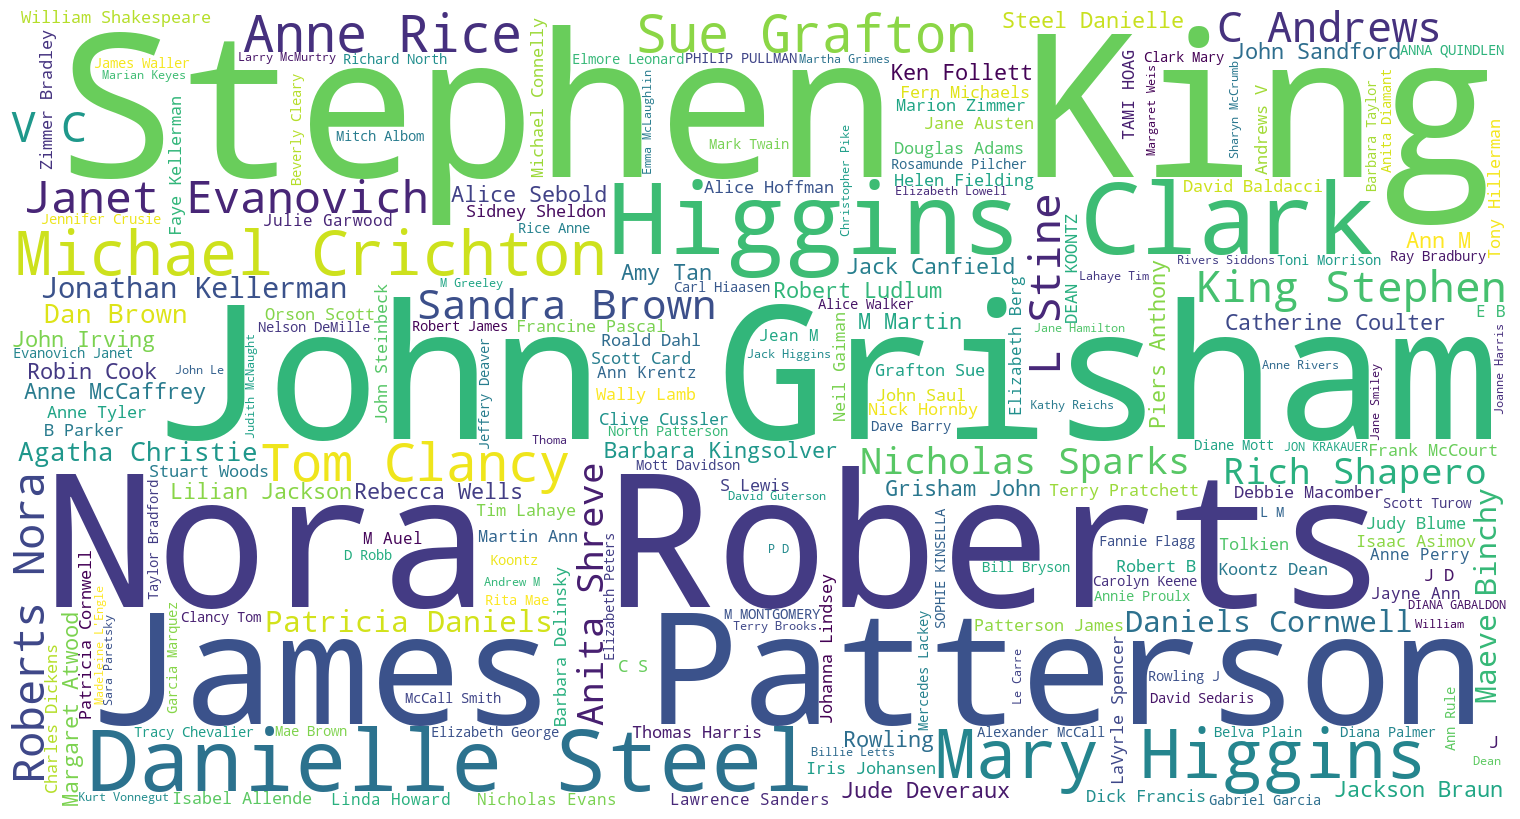

In [59]:
author_joined=' '.join(df['Book-Author'])
create_wordcloud(author_joined)

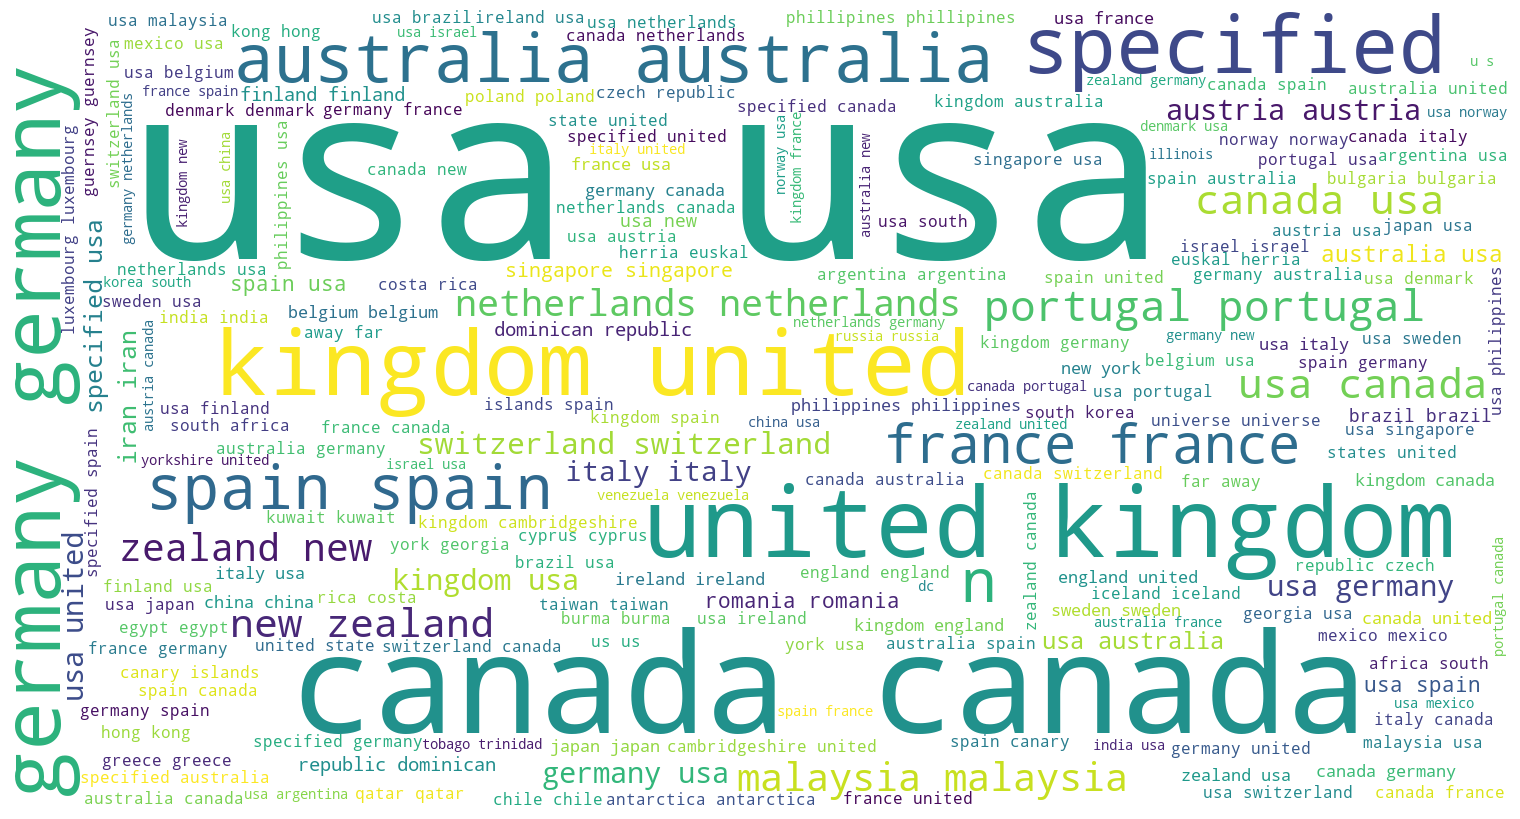

In [60]:
country_joined=' '.join(df['Country'])
create_wordcloud(country_joined)

# No of books published as per year

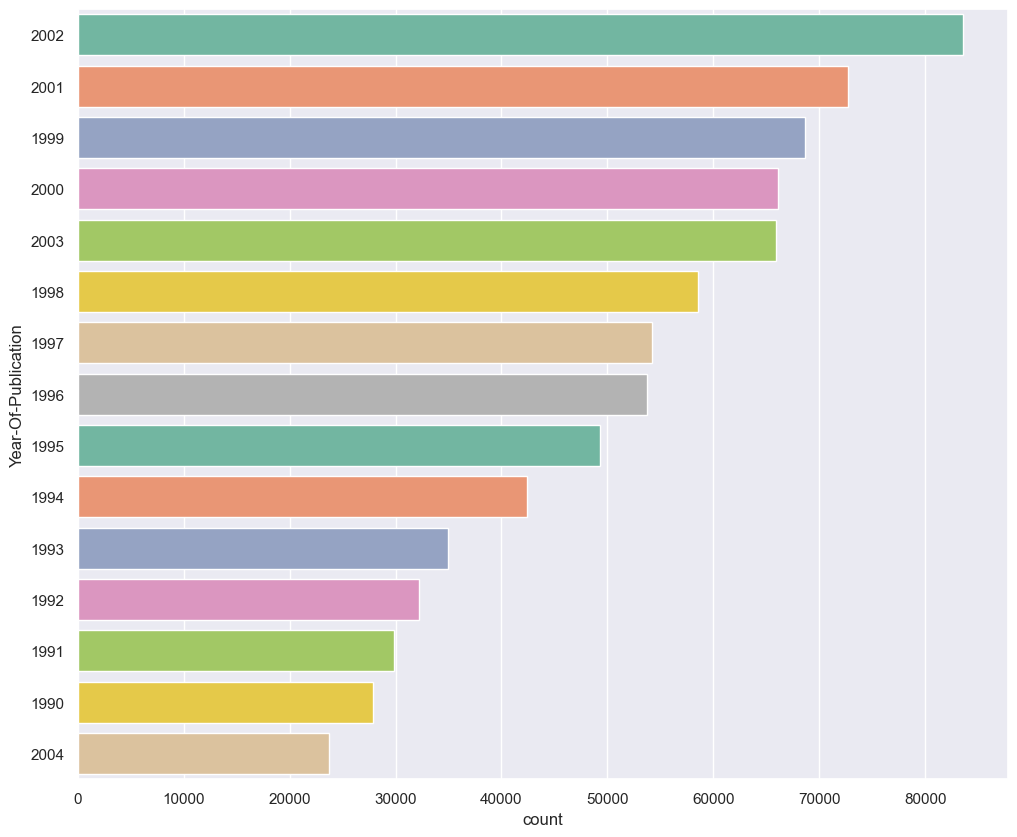

In [61]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y=df['Year-Of-Publication'], data=df, palette="Set2", order=df['Year-Of-Publication'].value_counts().index[0:15])

In [62]:
df.reset_index()

,index,User-ID,ISBN,Book-Rating,Location,Age,City,State,Country,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age_category
0,0,276725,034545104X,0,Tyler Texas Usa,35.0,tyler,texas,usa,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Young-adults
1,1,276726,155061224,5,Seattle Washington Usa,35.0,seattle,washington,usa,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,Young-adults
2,2,276727,446520802,0,H New South Wales Australia,16.0,h,new south wales,australia,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,Teenage
3,3,276729,052165615X,3,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,Teenage
4,4,276729,521795028,6,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,Teenage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941100,1048570,250764,451410777,0,Cove Oregon Usa,35.0,cove,oregon,usa,Sleep Tight (Onyx Book),Anne Frasier,2003,Onyx Books,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...,Young-adults
941101,1048571,250764,452264464,8,Cove Oregon Usa,35.0,cove,oregon,usa,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,Young-adults
941102,1048572,250764,048623715X,0,Cove Oregon Usa,35.0,cove,oregon,usa,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,Young-adults
941103,1048573,250764,486256588,0,Cove Oregon Usa,35.0,cove,oregon,usa,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,Young-adults


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941105 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   User-ID              941105 non-null  int64   
 1   ISBN                 941105 non-null  object  
 2   Book-Rating          941105 non-null  int64   
 3   Location             941105 non-null  object  
 4   Age                  941105 non-null  float64 
 5   City                 941105 non-null  object  
 6   State                941105 non-null  object  
 7   Country              941105 non-null  object  
 8   Book-Title           941105 non-null  object  
 9   Book-Author          941105 non-null  object  
 10  Year-Of-Publication  941105 non-null  int32   
 11  Publisher            941105 non-null  object  
 12  Image-URL-S          941105 non-null  object  
 13  Image-URL-M          941105 non-null  object  
 14  Image-URL-L          941105 non-null  object  
 15 

In [64]:
df1=df.iloc[:,[0,1,8,9,2]]

In [65]:
df1.head()

,User-ID,ISBN,Book-Title,Book-Author,Book-Rating
0,276725,034545104X,Flesh Tones: A Novel,M. J. Rose,0
1,276726,155061224,Rites of Passage,Judith Rae,5
2,276727,446520802,The Notebook,Nicholas Sparks,0
3,276729,052165615X,Help!: Level 1,Philip Prowse,3
4,276729,521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,6


In [66]:
df1.shape

(941105, 5)

In [67]:
df1[df1.duplicated()]

,User-ID,ISBN,Book-Title,Book-Author,Book-Rating
114974,26535,843947624,Unforgettable,Madeline Baker,0
227041,52584,399501487,Lord of the Flies,William Gerald Golding,0
432791,102967,425031748,Once and Future King,T. H. White,0
444054,106266,971880107,Wild Animus,Rich Shapero,0
528861,127429,64400085,These Happy Golden Years (Little House),Laura Ingalls Wilder,0
659167,159973,965078736,Yahoodywho,Kathy Griffin,0
799738,194027,60177209,Dolly: My Life and Other Unfinished Business,Dolly Parton,0


In [68]:
Data = df1.drop_duplicates().reset_index(drop = True)
Data

,User-ID,ISBN,Book-Title,Book-Author,Book-Rating
0,276725,034545104X,Flesh Tones: A Novel,M. J. Rose,0
1,276726,155061224,Rites of Passage,Judith Rae,5
2,276727,446520802,The Notebook,Nicholas Sparks,0
3,276729,052165615X,Help!: Level 1,Philip Prowse,3
4,276729,521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,6
...,...,...,...,...,...
941093,250764,451410777,Sleep Tight (Onyx Book),Anne Frasier,0
941094,250764,452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,8
941095,250764,048623715X,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,0
941096,250764,486256588,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,0


# Popularity based recommender system

In [123]:
Data_explicit = df[(df["Book-Rating"] > 0)]
Data_explicit = Data_explicit.drop_duplicates(subset = ['User-ID', 'Book-Title'], keep = 'first').reset_index(drop = True)
Data_explicit.shape

(350863, 16)

In [70]:
num_ratings=Data_explicit.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_ratings

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,1
1,Dark Justice,1
2,Earth Prayers From around the World: 365 Pray...,7
3,Final Fantasy Anthology: Official Strategy Gu...,2
4,Flight of Fancy: American Heiresses (Zebra Ba...,1
...,...,...
128571,Ã?Â?berleben in der WÃ?Â¼ste Danakil.,2
128572,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
128573,Ã?Â?rger mit Produkt X. Roman.,3
128574,Ã?Â?stlich der Berge.,1


In [71]:
avg_ratings=Data_explicit.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_ratings.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_ratings

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,Dark Justice,10.000000
2,Earth Prayers From around the World: 365 Pray...,7.142857
3,Final Fantasy Anthology: Official Strategy Gu...,10.000000
4,Flight of Fancy: American Heiresses (Zebra Ba...,8.000000
...,...,...
128571,Ã?Â?berleben in der WÃ?Â¼ste Danakil.,6.500000
128572,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
128573,Ã?Â?rger mit Produkt X. Roman.,7.000000
128574,Ã?Â?stlich der Berge.,8.000000


In [126]:
popular_df=num_ratings.merge(avg_ratings,on='Book-Title')
popular_df.sort_values(by='num_ratings',ascending=False)

,Book-Title,num_ratings,avg_ratings
104447,The Lovely Bones: A Novel,635,8.170079
125416,Wild Animus,526,4.442966
97265,The Da Vinci Code,458,8.438865
110173,The Secret Life of Bees,373,8.504021
106094,The Nanny Diaries: A Novel,354,7.392655
...,...,...,...
51525,Jonathan Harvey Plays: Beautiful Thing/Babies/...,1,9.000000
51524,"Jonathan Barrett, Gentleman Vampire",1,9.000000
51523,Jonas Vertrauen.,1,8.000000
51521,Jonah,1,6.000000


# The Lovely Bones: A Novel has got more no of ratings and maximum average rattings of 8.170.

In [73]:
popular_df= popular_df.merge(Data_explicit, on="Book-Title").drop_duplicates("Book-Title")
popular_df

,Book-Title,num_ratings,avg_ratings,User-ID,ISBN,Book-Rating,Location,Age,City,State,Country,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age_category
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000,96448,590567330,9,Albuquerque New Mexico Usa,35.0,albuquerque,new mexico,usa,Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,Young-adults
1,Dark Justice,1,10.000000,98391,399151788,10,Morrow Georgia Usa,52.0,morrow,georgia,usa,Jack Higgins,2004,Putnam Publishing Group,http://images.amazon.com/images/P/0399151788.0...,http://images.amazon.com/images/P/0399151788.0...,http://images.amazon.com/images/P/0399151788.0...,Middle-aged adults
2,Earth Prayers From around the World: 365 Pray...,7,7.142857,26544,006250746X,9,Woodbridge Virginia Usa,37.0,woodbridge,virginia,usa,Elizabeth Roberts,1991,HarperSanFrancisco,http://images.amazon.com/images/P/006250746X.0...,http://images.amazon.com/images/P/006250746X.0...,http://images.amazon.com/images/P/006250746X.0...,Young-adults
9,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000,30072,1566869250,10,St Louis Missouri Usa,11.0,st. louis,missouri,usa,David Cassady,1999,BradyGames,http://images.amazon.com/images/P/1566869250.0...,http://images.amazon.com/images/P/1566869250.0...,http://images.amazon.com/images/P/1566869250.0...,Children
11,Flight of Fancy: American Heiresses (Zebra Ba...,1,8.000000,61028,082177350X,8,Charleston South Carolina Usa,50.0,charleston,south carolina,usa,Tracy Cozzens,2002,Kensington Publishing Corporation,http://images.amazon.com/images/P/082177350X.0...,http://images.amazon.com/images/P/082177350X.0...,http://images.amazon.com/images/P/082177350X.0...,Middle-aged adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350855,Ã?Â?berleben in der WÃ?Â¼ste Danakil.,2,6.500000,167847,3492218091,5,Berlin Berlin Germany,24.0,berlin,berlin,germany,RÃ?Â¼diger Nehberg,1994,Piper,http://images.amazon.com/images/P/3492218091.0...,http://images.amazon.com/images/P/3492218091.0...,http://images.amazon.com/images/P/3492218091.0...,Young-adults
350857,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000,219420,3724303432,8,Mannheim Badenwuerttemberg Germany,29.0,mannheim,baden-wuerttemberg,germany,Christopher Fennel,1998,"Reich, Luzern",http://images.amazon.com/images/P/3724303432.0...,http://images.amazon.com/images/P/3724303432.0...,http://images.amazon.com/images/P/3724303432.0...,Young-adults
350858,Ã?Â?rger mit Produkt X. Roman.,3,7.000000,35407,325721538X,6,Gtersloh Nordrheinwestfalen Germany,48.0,gütersloh,nordrhein-westfalen,germany,Joan Aiken,1987,Diogenes Verlag,http://images.amazon.com/images/P/325721538X.0...,http://images.amazon.com/images/P/325721538X.0...,http://images.amazon.com/images/P/325721538X.0...,Middle-aged adults
350861,Ã?Â?stlich der Berge.,1,8.000000,90839,3442725739,8,Munich Bayern Germany,36.0,munich,bayern,germany,David Guterson,2000,btb,http://images.amazon.com/images/P/3442725739.0...,http://images.amazon.com/images/P/3442725739.0...,http://images.amazon.com/images/P/3442725739.0...,Young-adults


In [74]:
popular_df= popular_df.drop(['User-ID', 'City', 'State', 'Country', 'Book-Rating','Image-URL-S','Image-URL-L'], axis=1)
popular_df.reset_index(drop=True, inplace=True)

In [75]:
popular_df

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000,590567330,Albuquerque New Mexico Usa,35.0,Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,Young-adults
1,Dark Justice,1,10.000000,399151788,Morrow Georgia Usa,52.0,Jack Higgins,2004,Putnam Publishing Group,http://images.amazon.com/images/P/0399151788.0...,Middle-aged adults
2,Earth Prayers From around the World: 365 Pray...,7,7.142857,006250746X,Woodbridge Virginia Usa,37.0,Elizabeth Roberts,1991,HarperSanFrancisco,http://images.amazon.com/images/P/006250746X.0...,Young-adults
3,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000,1566869250,St Louis Missouri Usa,11.0,David Cassady,1999,BradyGames,http://images.amazon.com/images/P/1566869250.0...,Children
4,Flight of Fancy: American Heiresses (Zebra Ba...,1,8.000000,082177350X,Charleston South Carolina Usa,50.0,Tracy Cozzens,2002,Kensington Publishing Corporation,http://images.amazon.com/images/P/082177350X.0...,Middle-aged adults
...,...,...,...,...,...,...,...,...,...,...,...
128571,Ã?Â?berleben in der WÃ?Â¼ste Danakil.,2,6.500000,3492218091,Berlin Berlin Germany,24.0,RÃ?Â¼diger Nehberg,1994,Piper,http://images.amazon.com/images/P/3492218091.0...,Young-adults
128572,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000,3724303432,Mannheim Badenwuerttemberg Germany,29.0,Christopher Fennel,1998,"Reich, Luzern",http://images.amazon.com/images/P/3724303432.0...,Young-adults
128573,Ã?Â?rger mit Produkt X. Roman.,3,7.000000,325721538X,Gtersloh Nordrheinwestfalen Germany,48.0,Joan Aiken,1987,Diogenes Verlag,http://images.amazon.com/images/P/325721538X.0...,Middle-aged adults
128574,Ã?Â?stlich der Berge.,1,8.000000,3442725739,Munich Bayern Germany,36.0,David Guterson,2000,btb,http://images.amazon.com/images/P/3442725739.0...,Young-adults


In [124]:
popular_books=popular_df[(popular_df['avg_ratings']>=7.5) & (popular_df['num_ratings']>=100)].sort_values("avg_ratings", ascending=False).head(50)
popular_books.head()

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
112894,"The Two Towers (The Lord of the Rings, Part 2)",128,9.335938,345339711,San Diego California Usa,20.0,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,Teenage
43001,Harry Potter and the Prisoner of Azkaban (Book 3),244,9.102459,439136369,Lakeland Tennessee Usa,57.0,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,Middle-aged adults
43008,Harry Potter and the Sorcerer's Stone (Book 1),151,9.086093,590353403,Minneapolis Minnesota Usa,24.0,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,Young-adults
42989,Harry Potter and the Goblet of Fire (Book 4),222,9.085586,439139600,Lakeland Tennessee Usa,57.0,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,Middle-aged adults
42993,Harry Potter and the Order of the Phoenix (Boo...,194,9.030928,043935806X,Mentone California Usa,35.0,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,Young-adults


In [77]:
popular_books.shape

(50, 11)

In [78]:
popular_books.loc[popular_books.ISBN == "0395272211", "Location"] = "Not Available"
popular_books

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
112894,"The Two Towers (The Lord of the Rings, Part 2)",128,9.335938,345339711,San Diego California Usa,20.0,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,Teenage
43001,Harry Potter and the Prisoner of Azkaban (Book 3),244,9.102459,439136369,Lakeland Tennessee Usa,57.0,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,Middle-aged adults
43008,Harry Potter and the Sorcerer's Stone (Book 1),151,9.086093,590353403,Minneapolis Minnesota Usa,24.0,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,Young-adults
42989,Harry Potter and the Goblet of Fire (Book 4),222,9.085586,439139600,Lakeland Tennessee Usa,57.0,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,Middle-aged adults
42993,Harry Potter and the Order of the Phoenix (Boo...,194,9.030928,043935806X,Mentone California Usa,35.0,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,Young-adults
117289,To Kill a Mockingbird,241,8.966805,446310786,Petaling Jaya Selangor Malaysia,18.0,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,Teenage
32608,Ender's Game (Ender Wiggins Saga (Paperback)),134,8.940299,812533550,Arlington Massachusetts Usa,35.0,Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,Young-adults
43011,Harry Potter and the Sorcerer's Stone (Harry P...,287,8.930314,059035342X,Pittsburgh Pennsylvania Usa,35.0,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,Young-adults
42982,Harry Potter and the Chamber of Secrets (Book 2),289,8.851211,439064872,Lakeland Tennessee Usa,57.0,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,Middle-aged adults
99388,The Fellowship of the Ring (The Lord of the Ri...,186,8.844086,618129030,Cary North Carolina Usa,35.0,J. R. R. Tolkien,2001,Houghton Mifflin Company,http://images.amazon.com/images/P/0618129030.0...,Young-adults


In [79]:
popular_books_c=popular_df[(popular_df['avg_ratings']>=5) & (popular_df['num_ratings']>=15)].sort_values("avg_ratings", ascending=False)
popular_books_c

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
42985,Harry Potter and the Chamber of Secrets Postca...,21,9.857143,439425220,Bellwood Pennsylvania Usa,35.0,J. K. Rowling,2002,Scholastic,http://images.amazon.com/images/P/0439425220.0...,Young-adults
16399,Calvin and Hobbes,22,9.636364,836220889,Ottawa Ontario Canada,35.0,Bill Watterson,1987,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836220889.0...,Young-adults
93123,The Authoritative Calvin and Hobbes (Calvin an...,19,9.631579,836218221,Montreal Quebec Canada,35.0,Bill Watterson,1990,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836218221.0...,Young-adults
109143,"The Return of the King (The Lord of The Rings,...",16,9.625000,618002243,Santo Tirso Porto Portugal,21.0,J. R. R. Tolkien,1999,Houghton Mifflin Company,http://images.amazon.com/images/P/0618002243.0...,Young-adults
37583,Fox in Socks (I Can Read It All by Myself Begi...,15,9.600000,394800389,Duluth Minnesota Usa,28.0,Dr. Seuss,1965,Random House Children's Books,http://images.amazon.com/images/P/0394800389.0...,Young-adults
...,...,...,...,...,...,...,...,...,...,...,...
50234,Isle of Dogs,90,5.344444,425182908,Elburn Illinois Usa,35.0,Patricia Cornwell,2002,Berkley Publishing Group,http://images.amazon.com/images/P/0425182908.0...,Young-adults
67635,Naked Lunch,22,5.181818,802132952,Norfolk Virginia Usa,18.0,William S. Burroughs,1992,Grove Press,http://images.amazon.com/images/P/0802132952.0...,Teenage
20759,Confessions of a Sociopathic Social Climber : ...,18,5.166667,312288115,Rome New York Usa,35.0,Adele Lang,2002,Thomas Dunne Books,http://images.amazon.com/images/P/0312288115.0...,Young-adults
52812,Killing Time: A Novel of the Future,15,5.066667,679463321,San Diego California Usa,38.0,Caleb Carr,2000,Random House Trade,http://images.amazon.com/images/P/0679463321.0...,Young-adults


In [80]:
popular_books_age=popular_df[(popular_df['avg_ratings']>=7) & (popular_df['num_ratings']>=50)].sort_values("avg_ratings", ascending=False)
popular_books_age

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
95524,The Cat in the Hat,28,9.214286,039480001X,Olympia Washington Usa,8.0,Dr. Seuss,1957,Random House Books for Young Readers,http://images.amazon.com/images/P/039480001X.0...,Children
45465,Hop on Pop (I Can Read It All by Myself Beginn...,17,9.058824,039480029X,Olympia Washington Usa,8.0,Dr. Seuss,1963,Random House Books for Young Readers,http://images.amazon.com/images/P/039480029X.0...,Children
77810,Random Acts of Kindness,17,8.882353,1573248533,Calgary Alberta Canada,11.0,Dawna Markova,2002,Conari Press,http://images.amazon.com/images/P/1573248533.0...,Children
18019,Charlotte's Web,44,8.477273,059030271X,Highland California Usa,10.0,E. B. White,1974,Scholastic Paperbacks (T),http://images.amazon.com/images/P/059030271X.0...,Children
30264,E-Wally and the Quest,17,8.117647,971181802,St Charles County Missouri Usa,2.0,Judy Shasek,2001,Inventeam Llc,http://images.amazon.com/images/P/0971181802.0...,Children
94734,The Boy Next Door,57,8.035088,60096195,Calgary Alberta Canada,11.0,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,Children
8893,"Artemis Fowl (Artemis Fowl, Book 1)",94,7.861702,786817070,Calgary Alberta Canada,11.0,Eoin Colfer,2002,Miramax Kids,http://images.amazon.com/images/P/0786817070.0...,Children
98013,The Dive From Clausen's Pier : A Novel (Vintag...,48,7.604167,375727132,Grosse Pointe Michigan Usa,1.0,ANN PACKER,2003,Vintage,http://images.amazon.com/images/P/0375727132.0...,Children
60673,Madame Bovary,16,7.125000,451523873,St Charles County Missouri Usa,2.0,Gustave Flaubert,1994,Signet Classics,http://images.amazon.com/images/P/0451523873.0...,Children
14296,Border Music,28,6.464286,446518581,Gardiner Maine Usa,12.0,Robert James Waller,1995,Warner Books,http://images.amazon.com/images/P/0446518581.0...,Children


In [129]:
Children = ['Children']
popular_books_Children = popular_books_c[popular_books_c['Age_category'].isin(Children)]
popular_books_Children = popular_books_Children.head(10)
popular_books_Children.sort_values(by='num_ratings',ascending=False).head(3)

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
8893,"Artemis Fowl (Artemis Fowl, Book 1)",94,7.861702,786817070,Calgary Alberta Canada,11.0,Eoin Colfer,2002,Miramax Kids,http://images.amazon.com/images/P/0786817070.0...,Children
94734,The Boy Next Door,57,8.035088,60096195,Calgary Alberta Canada,11.0,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,Children
98013,The Dive From Clausen's Pier : A Novel (Vintag...,48,7.604167,375727132,Grosse Pointe Michigan Usa,1.0,ANN PACKER,2003,Vintage,http://images.amazon.com/images/P/0375727132.0...,Children


- Artemis Fowl (Artemis Fowl, Book 1)
- The Boy Next Door
- The Dive From Clausen's Pier : A Novel 
# These are the most popular among the children.

In [130]:
teen = ['Teenage']
popular_books_Teenage = popular_books_age[popular_books_age['Age_category'].isin(teen)]
popular_books_Teenage = popular_books_Teenage[popular_books_Teenage['num_ratings']>40].sort_values('avg_ratings', ascending= False)
popular_books_Teenage = popular_books_Teenage.head(10)
popular_books_Teenage.sort_values(by='num_ratings',ascending=False).head(3)

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
110173,The Secret Life of Bees,373,8.504021,142001740,Baton Rouge Louisiana Usa,17.0,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,Teenage
117289,To Kill a Mockingbird,241,8.966805,446310786,Petaling Jaya Selangor Malaysia,18.0,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,Teenage
119065,"Tuesdays with Morrie: An Old Man, a Young Man,...",216,8.601852,385484518,Baton Rouge Louisiana Usa,17.0,MITCH ALBOM,1997,Doubleday,http://images.amazon.com/images/P/0385484518.0...,Teenage


- The Secret Life of Bees
- To Kill a Mockingbird
- Tuesdays with Morrie: An Old Man, a Young Man
# These are the books which are most popular among the teenager

In [131]:
Young_adults = ['Young-adults']
popular_books_Young_adults = popular_books_age[popular_books_age['Age_category'].isin(Young_adults)]
popular_books_Young_adults = popular_books_Young_adults[popular_books_Young_adults['num_ratings']>250].sort_values('avg_ratings', ascending= False)
popular_books_Young_adults = popular_books_Young_adults.head(10)
popular_books_Young_adults.sort_values(by='num_ratings',ascending=False).head(3)

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
97265,The Da Vinci Code,458,8.438865,385504209,Barcelona Barcelona Spain,22.0,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,Young-adults
108984,The Red Tent (Bestselling Backlist),354,8.163842,312195516,Vancouver British Columbia Canada,33.0,Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,Young-adults
106094,The Nanny Diaries: A Novel,354,7.392655,312278586,Charleston West Virginia Usa,35.0,Emma McLaughlin,2002,St. Martin's Press,http://images.amazon.com/images/P/0312278586.0...,Young-adults


- The Da Vinci Code
- The Red Tent (Bestselling Backlist)
- The Nanny Diaries: A Novel 
#  These are the books which are most popular among the young adults

In [132]:
Middle_aged_adults = ['Middle-aged adults']
popular_books_Middle_aged_adults = popular_books_age[popular_books_age['Age_category'].isin(Middle_aged_adults)]
popular_books_Middle_aged_adults= popular_books_Middle_aged_adults[popular_books_Middle_aged_adults['num_ratings']>100].sort_values('avg_ratings', ascending= False)
popular_books_Middle_aged_adults = popular_books_Middle_aged_adults.head(10)
popular_books_Middle_aged_adults.sort_values(by='num_ratings',ascending=False).head(3)

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
42982,Harry Potter and the Chamber of Secrets (Book 2),289,8.851211,439064872,Lakeland Tennessee Usa,57.0,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,Middle-aged adults
43001,Harry Potter and the Prisoner of Azkaban (Book 3),244,9.102459,439136369,Lakeland Tennessee Usa,57.0,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,Middle-aged adults
42989,Harry Potter and the Goblet of Fire (Book 4),222,9.085586,439139600,Lakeland Tennessee Usa,57.0,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,Middle-aged adults


- Harry Potter and the Chamber of Secrets (Book 2)
- Harry Potter and the Prisoner of Azkaban (Book 3)
- Harry Potter and the Goblet of Fire (Book 4)
# These are the books which are most popular among middle aged adults

In [133]:
Old_Aged_adults = ['Old-Aged adults']
popular_books_Old_Aged_adults = popular_books_age[popular_books_age['Age_category'].isin(Old_Aged_adults)]
popular_books_Old_Aged_adults = popular_books_Old_Aged_adults[popular_books_Old_Aged_adults['num_ratings']>70].sort_values('avg_ratings', ascending= False)
popular_books_Old_Aged_adults = popular_books_Old_Aged_adults.head(10)
popular_books_Old_Aged_adults.sort_values(by='num_ratings',ascending=False).head(3)

,Book-Title,num_ratings,avg_ratings,ISBN,Location,Age,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Age_category
104447,The Lovely Bones: A Novel,635,8.170079,316666343,Turner Oregon Usa,65.0,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,Old-Aged adults
7714,Angels &amp; Demons,291,7.986254,743486226,Garden Grove California Usa,70.0,Dan Brown,2003,Atria,http://images.amazon.com/images/P/0743486226.0...,Old-Aged adults
34947,Fast Food Nation: The Dark Side of the All-Ame...,140,8.414286,60938455,Houston Texas Usa,66.0,Eric Schlosser,2002,Perennial,http://images.amazon.com/images/P/0060938455.0...,Old-Aged adults


- The Lovely Bones: A Novel
- Angels &amp; Demons
- Fast Food Nation: The Dark Side of the All-Ame..
# These are the books popular among the old ages adults

In [86]:
#basic overview
print('After data cleaning, the final dataset has:')
print(len(df1.groupby(['Book-Title']).count()), 'books')
print(len(df1.groupby(['Book-Author']).count()), 'authors')
print(len(df1.groupby(['ISBN']).count()), 'book-code')

After data cleaning, the final dataset has:
230215 books
97225 authors
257808 book-code


# Content based 

In [87]:
x=df1.groupby("User-ID").count()["Book-Rating"]>50

In [88]:
x_table = x[x].index#boolean indexing x[x] helps us to filter the userid rated more than 50 times
x_table

Int64Index([   243,    254,    507,    638,    643,    741,    882,    929,
              1211,   1424,
            ...
            277928, 277965, 278026, 278137, 278144, 278188, 278418, 278582,
            278633, 278843],
           dtype='int64', name='User-ID', length=2742)

In [89]:
updated_rating = df1[df1["User-ID"].isin(x_table)]

In [90]:
updated_rating.sort_values(by='User-ID')

,User-ID,ISBN,Book-Title,Book-Author,Book-Rating
10031,243,803251718,Crazy Horse,Mari Sandoz,5
10013,243,449911004,Patty Jane's House of Curl (Ballantine Reader'...,LORNA LANDVIK,0
10011,243,446612790,2nd Chance,James Patterson,0
10010,243,446610399,The Rescue,Nicholas Sparks,0
10009,243,446606383,The Midnight Club,James Patterson,6
...,...,...,...,...,...
9482,278843,440477093,The Secret Garden,Frances H. Burnett,0
9483,278843,446678651,Fun with Phone Solicitors : 50 Ways to Get Even!,Robert Harris,0
9484,278843,449223604,M Is for Malice,Sue Grafton,0
9486,278843,553574760,Death at Buckingham Palace: Her Majesty Invest...,C. C. Benison,0


In [91]:
y = updated_rating.groupby("Book-Title").count()["Book-Rating"]>=50

In [92]:
y_table=y[y].index

In [93]:
y[y].index

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Wuthering Heights (Penguin Classics)',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=1207)

In [94]:
final_rating=updated_rating[updated_rating["Book-Title"].isin(y_table)]

In [95]:
final_rating.head()

,User-ID,ISBN,Book-Title,Book-Author,Book-Rating
413,276925,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,10
419,276925,140327592,Matilda,Roald Dahl,0
426,276925,316666343,The Lovely Bones: A Novel,Alice Sebold,0
429,276925,385504209,The Da Vinci Code,Dan Brown,8
453,276925,804106304,The Joy Luck Club,Amy Tan,0


In [96]:
table = final_rating.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating').fillna(0)

In [134]:
table.head()

User-ID,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
from scipy.sparse import csr_matrix
user_rating_matrix = csr_matrix(table.values)

from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [99]:
query_index = np.random.choice(table.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(table.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

64


In [100]:
table.shape

(1207, 2683)

In [101]:
table.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [102]:
table.index[query_index]

'All Creatures Great and Small'

In [103]:
indices.flatten()

array([  64,  450,  892, 1016,  857,  790], dtype=int64)

In [104]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(table.index[query_index]))
    else:
        print('{0}: {1}'.format(i, table.index[indices.flatten()[i]]))

Recommendations for All Creatures Great and Small:

1: It Was on Fire When I Lay Down on It
2: The Edible Woman
3: The Professor and the Madman: A Tale of Murder, Insanity, and the Making of The Oxford English Dictionary
4: The Charm School
5: Surfacing


# Model evaluation

In [136]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(table.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, table.index[indices.flatten()[i]], distances.flatten()[i]))
        

Recommendations for All Creatures Great and Small:

1: It Was on Fire When I Lay Down on It, with distance of 0.7461249310331384:
2: The Edible Woman, with distance of 0.7521558892443729:
3: The Professor and the Madman: A Tale of Murder, Insanity, and the Making of The Oxford English Dictionary, with distance of 0.7558871468636338:
4: The Charm School, with distance of 0.7607142338222079:
5: Surfacing, with distance of 0.7772282361737806:


# User based collaborative filtering

In [105]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine,correlation

In [164]:
matrix = final_rating.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)
matrix.head()

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
243,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,...,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365,-0.080365
254,8.892295,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,...,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705,-0.107705
507,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,...,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940,-0.038940
638,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896,8.782104,-0.217896,-0.217896,-0.217896,-0.217896,...,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896,-0.217896
643,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,...,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800,-0.005800


In [108]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

User-ID,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
User-ID,,,,,,,,,,,,,,,,,,,,,
243,1.000000,-0.011670,-0.007143,0.103114,-0.002945,-0.002945,-0.010350,-0.007115,-0.005098,0.151507,...,-0.005879,-0.007050,0.052568,-0.007653,NaN,-0.009625,-0.008373,-0.008489,0.041753,-0.008839
254,-0.011670,1.000000,0.254148,-0.017509,-0.003286,-0.003286,-0.011547,-0.007938,-0.005687,-0.010337,...,-0.006559,-0.007865,-0.012221,-0.008538,NaN,-0.010738,-0.009340,-0.009470,-0.013627,0.090352
507,-0.007143,0.254148,1.000000,-0.010718,-0.002011,-0.002011,-0.007068,-0.004859,-0.003481,-0.006328,...,-0.004015,-0.004814,-0.007481,-0.005226,NaN,-0.006573,-0.005718,-0.005797,-0.008341,-0.006036
638,0.103114,-0.017509,-0.010718,1.000000,-0.004419,-0.004419,0.112880,-0.010675,0.113857,0.049002,...,-0.008821,0.041065,-0.016435,0.060848,NaN,-0.014441,0.053474,-0.012736,0.085282,-0.013261
643,-0.002945,-0.003286,-0.002011,-0.004419,1.000000,-0.000829,-0.002914,-0.002003,-0.001435,-0.002609,...,-0.001655,-0.001985,-0.003084,-0.002155,NaN,-0.002710,-0.002357,-0.002390,-0.003439,-0.002489


In [109]:
# User similarity matrix using cosine similarity
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.        , -0.01166985, -0.00714349, ..., -0.00848852,
         0.04175335, -0.0088389 ],
       [-0.01166985,  1.        ,  0.25414792, ..., -0.00946971,
        -0.01362665,  0.09035151],
       [-0.00714349,  0.25414792,  1.        , ..., -0.00579672,
        -0.00834132, -0.00603599],
       ...,
       [-0.00848852, -0.00946971, -0.00579672, ...,  1.        ,
        -0.00991188, -0.00717249],
       [ 0.04175335, -0.01362665, -0.00834132, ..., -0.00991188,
         1.        ,  0.0860499 ],
       [-0.0088389 ,  0.09035151, -0.00603599, ..., -0.00717249,
         0.0860499 ,  1.        ]])

In [110]:
# Pick a user ID
picked_userid = np.random.choice(user_similarity.index)

print(picked_userid)

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity.head()

93179


User-ID,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
User-ID,,,,,,,,,,,,,,,,,,,,,
243,1.000000,-0.011670,-0.007143,0.103114,-0.002945,-0.002945,-0.010350,-0.007115,-0.005098,0.151507,...,-0.005879,-0.007050,0.052568,-0.007653,NaN,-0.009625,-0.008373,-0.008489,0.041753,-0.008839
254,-0.011670,1.000000,0.254148,-0.017509,-0.003286,-0.003286,-0.011547,-0.007938,-0.005687,-0.010337,...,-0.006559,-0.007865,-0.012221,-0.008538,NaN,-0.010738,-0.009340,-0.009470,-0.013627,0.090352
507,-0.007143,0.254148,1.000000,-0.010718,-0.002011,-0.002011,-0.007068,-0.004859,-0.003481,-0.006328,...,-0.004015,-0.004814,-0.007481,-0.005226,NaN,-0.006573,-0.005718,-0.005797,-0.008341,-0.006036
638,0.103114,-0.017509,-0.010718,1.000000,-0.004419,-0.004419,0.112880,-0.010675,0.113857,0.049002,...,-0.008821,0.041065,-0.016435,0.060848,NaN,-0.014441,0.053474,-0.012736,0.085282,-0.013261
643,-0.002945,-0.003286,-0.002011,-0.004419,1.000000,-0.000829,-0.002914,-0.002003,-0.001435,-0.002609,...,-0.001655,-0.001985,-0.003084,-0.002155,NaN,-0.002710,-0.002357,-0.002390,-0.003439,-0.002489


In [111]:
# Number of similar users
n = 5

# User similarity threashold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 93179 are User-ID
86680    0.310109
Name: 93179, dtype: float64


In [112]:
# Books that the target user has read
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
93179,-0.173985,-0.173985,-0.173985,-0.173985,-0.173985,-0.173985,-0.173985,-0.173985,-0.173985,-0.173985,...,-0.173985,-0.173985,-0.173985,-0.173985,-0.173985,-0.173985,-0.173985,-0.173985,-0.173985,-0.173985


In [113]:
# Books that similar users watched. Remove books that none of the similar users have read.
similar_user_books = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_books

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
86680,-0.009114,-0.009114,-0.009114,-0.009114,-0.009114,-0.009114,-0.009114,-0.009114,-0.009114,-0.009114,...,-0.009114,-0.009114,-0.009114,-0.009114,-0.009114,-0.009114,-0.009114,-0.009114,-0.009114,-0.009114


In [114]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_books.columns:
  # Get the ratings for book i
  book_rating = similar_user_books[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the book has rating
    if pd.isna(book_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the book rating
      score = similar_users[u] * book_rating[u]
      # Add the score to the total score for the book so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['book', 'book_score'])
    
# Sort the books by score
ranked_item_score = item_score.sort_values(by='book_score', ascending=False)

# Select top m books
m = 10
ranked_item_score.head(m)

,book,book_score
60,Airframe,1.857829
31,A Painted House,1.547720
0,1984,-0.002826
804,Tell Me Your Dreams,-0.002826
810,The Accidental Tourist,-0.002826
809,The Absence of Nectar,-0.002826
808,That Camden Summer,-0.002826
807,Terminal,-0.002826
806,Temptation,-0.002826
805,Tell No One,-0.002826


# User Based Recommendation

In [153]:
Data_sample = df.sample(n=10000)
Data_sample.head()

,User-ID,ISBN,Book-Rating,Location,Age,City,State,Country,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age_category
217956,51207,446601241,10,Mountain City Tennessee Usa,35.0,mountain city,tennessee,usa,Kiss the Girls,James Patterson,1995,Warner Books,http://images.amazon.com/images/P/0446601241.0...,http://images.amazon.com/images/P/0446601241.0...,http://images.amazon.com/images/P/0446601241.0...,Young-adults
877537,212804,380816547,0,Louisville Kentucky Usa,20.0,louisville,kentucky,usa,Island of the Sequined Love Nun,Christopher Moore,2000,Perennial,http://images.amazon.com/images/P/0380816547.0...,http://images.amazon.com/images/P/0380816547.0...,http://images.amazon.com/images/P/0380816547.0...,Teenage
202052,45557,449221431,0,Flossmoor Illinois Usa,33.0,flossmoor,illinois,usa,The Novel,James A. Michener,1992,Fawcett Books,http://images.amazon.com/images/P/0449221431.0...,http://images.amazon.com/images/P/0449221431.0...,http://images.amazon.com/images/P/0449221431.0...,Young-adults
759613,183952,380819597,7,Alexandria Louisiana Usa,68.0,alexandria,louisiana,usa,The Last Convertible,Anton Myrer,2001,HarperTorch,http://images.amazon.com/images/P/0380819597.0...,http://images.amazon.com/images/P/0380819597.0...,http://images.amazon.com/images/P/0380819597.0...,Old-Aged adults
213339,49683,684854163,5,Houston Texas Usa,23.0,houston,texas,usa,Infusions of Healing : A TREASURY OF MEXICAN-A...,Joie Davidow,1999,Fireside,http://images.amazon.com/images/P/0684854163.0...,http://images.amazon.com/images/P/0684854163.0...,http://images.amazon.com/images/P/0684854163.0...,Young-adults


In [116]:
Data_sample['Book-Title'].nunique()

8348

In [117]:
Data_sample.shape

(10000, 16)

In [154]:
data_pt=Data_sample.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
data_pt.fillna(0,inplace=True)
data_pt.head()

User-ID,56,242,243,244,254,487,595,728,741,769,...,278100,278144,278188,278194,278221,278257,278346,278411,278418,278522
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
It Takes Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'G' Is for Grafton : The World of Kinsey Millhone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Tis Herself : A Memoir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
type(data_pt)

pandas.core.frame.DataFrame

In [159]:
similarity_score=cosine_similarity(data_pt)
similarity_score[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [145]:
np.where(data_pt.index=="Zoya")[0][0]

8336

In [ ]:
sorted(list(enumerate(similarity_score[8336])), key=lambda x:x[1], reverse=True)[1:11]

In [155]:
def recommend(book_name):
    index= np.where(data_pt.index == book_name)[0][0]
    similar_books=sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1], reverse=True)[1:11]

    for i in similar_books:
        print(data_pt.index[i[0]])

In [156]:
recommend("Zoya")

Zoya
 Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750
 It Takes Two
'G' Is for Grafton : The World of Kinsey Millhone
'Salem's Lot
'Tis Herself : A Memoir
'night, Mother : A Play (Mermaid Dramabook)
01-01-00: The Novel of the Millennium
1 Mans Homestead (Illus)
1, 2, 3


In [157]:
def recommend(book_name):
    index= np.where(data_pt.index == book_name)[0][0]
    similar_books=sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1], reverse=True)[1:11]

    for i in similar_books:
        print("Book name: ", data_pt.index[i[0]], "Similarity score: ", i[1])


In [163]:
recommend('Zoya')

Book name:   It Takes Two Similarity score:  0.0
Book name:  'G' Is for Grafton : The World of Kinsey Millhone Similarity score:  0.0
Book name:  'Salem's Lot Similarity score:  0.0
Book name:  'Tis Herself : A Memoir Similarity score:  0.0
Book name:  'night, Mother : A Play (Mermaid Dramabook) Similarity score:  0.0
Book name:  01-01-00: The Novel of the Millennium Similarity score:  0.0
Book name:  1 Mans Homestead (Illus) Similarity score:  0.0
Book name:  1, 2, 3 Similarity score:  0.0
Book name:  100 Malicious Little Mysteries Similarity score:  0.0
Book name:  1001 Things Everyone Should Know About the South Similarity score:  0.0


In [ ]:
import pickle

In [ ]:
pickle.dump(similarity_score,open('similarity.pkl','wb'))

In [ ]:
pickle.dump(data_pt,open('data_pt.pkl','wb'))

In [ ]:
pickle.dump(Data_sample,open('Data_sample.pkl','wb'))

In [ ]:
pickle.dump(popular_books,open('popular_books.pkl','wb'))

In [ ]:
pickle.dump(popular_books_Children,open('popular_books_Children.pkl','wb'))

In [ ]:
pickle.dump(popular_books_Teenage,open('popular_books_Teenage.pkl','wb'))

In [ ]:
pickle.dump(popular_books_Young_adults,open('popular_books_Young_adults.pkl','wb'))

In [ ]:
pickle.dump(popular_books_Middle_aged_adults,open('popular_books_Middle_aged_adults.pkl','wb'))

In [ ]:
pickle.dump(popular_books_Old_Aged_adults,open('popular_books_Old_Aged_adults.pkl','wb'))